In [34]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
import sklearn.metrics as metrics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [35]:
names = ['sepal_Length','sepal_Width','petal_Length','petal_Width', 'species']

dataset = pd.read_csv("IRIS.csv", names=names)


In [36]:
dataset = dataset.drop(0)

In [45]:
X = dataset.iloc[:, :-1]  

label = {'Iris-setosa': 0,'Iris-versicolor': 1, 'Iris-virginica': 2} 

y = [label[c] for c in dataset.iloc[:, -1]]

plt.figure(figsize=(14,7))
colormap=np.array(['red','lime','black'])


<Figure size 1400x700 with 0 Axes>

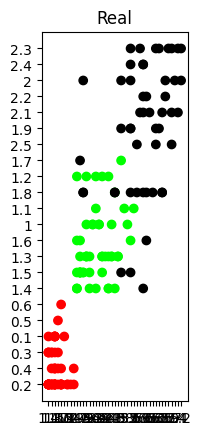

In [38]:
# REAL PLOT
plt.subplot(1,3,1)
plt.title('Real')
plt.scatter(X.petal_Length,X.petal_Width,c=colormap[y])


C:\Users\satwi\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


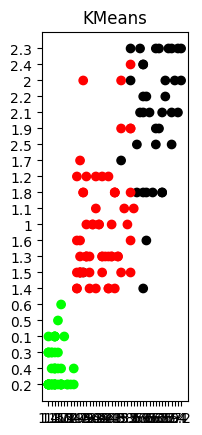

In [46]:
# K-PLOT
model=KMeans(n_clusters=3, random_state=0).fit(X)
plt.subplot(1,3,2)
plt.title('KMeans')
plt.scatter(X.petal_Length,X.petal_Width,c=colormap[model.labels_])


In [41]:
print('The accuracy score of K-Mean: ',metrics.accuracy_score(y, model.labels_))
print('The Confusion matrixof K-Mean:\n',metrics.confusion_matrix(y, model.labels_))


The accuracy score of K-Mean:  0.24
The Confusion matrixof K-Mean:
 [[ 0 50  0]
 [48  0  2]
 [14  0 36]]


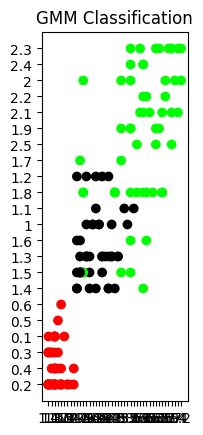

In [43]:
# GMM PLOT
gmm=GaussianMixture(n_components=3, random_state=0).fit(X)
y_cluster_gmm=gmm.predict(X)
plt.subplot(1,3,3)
plt.title('GMM Classification')
plt.scatter(X.petal_Length,X.petal_Width,c=colormap[y_cluster_gmm])

In [44]:
print('The accuracy score of EM: ',metrics.accuracy_score(y, y_cluster_gmm))
print('The Confusion matrix of EM:\n ',metrics.confusion_matrix(y, y_cluster_gmm))

The accuracy score of EM:  0.36666666666666664
The Confusion matrix of EM:
  [[50  0  0]
 [ 0  5 45]
 [ 0 50  0]]
